# Electric Car Sentiment Analysis Project

## Overview
  * The goal of this project is to build a machine learning model that analyzes tweets and predicts their sentiments i.e. Positive, Negative and Neutral.
  * The project primarily focuses on general sentiments about Electric cars only.
  * The approach to implement this model is to:
       <ul>
           <li>Train a custom Word2vec model on the tweet dataset. It will assign embeddings to every word within the corpus.</li>
           <li>Train a KMeans clustering algorithm to group similar meaning words in the same clusters. This gives us intuition about positive, negative, and neutral words.</li>
           <li>Compute the sentiments of a whole tweet by averaging out the sentiments of individual words within the tweet. Thus we get our labels.</li>
           <li> Now we follow a supervised training approach, wherein we'll train our models based on the train and test labels.</li>
           <li>The best-performing model will be selected for further analysis</li>
           <li>Analyze Tesla tweets about electric cars and check if there is any correlation with its stock market. </li>
    </ul>

## Business Problem


  * **Electric cars are the future**, is a statement that has been extensively marketed by experts in the last few years. Due to this, their popularity is booming and a lot of big players from the automobile industry have shown keen interest in them.
  * The electric car band-wagon is gathering speed with Volkswagen now saying 70% of sedan and SUV sales from its namesake VW brand in Europe will be battery-electric by 2030 and investment bank UBS raising its global electric predictions to unprecedented heights; but is this exuberance shared by mainstream forecasters as well? "Forbes"
  * Are potential buyers enthusiastic about the emergence of EVs or is it just another marketing facade?
  * Will People prefer EVs over traditional cars due to their green technology or are they worried that excessive use and replacements of batteries is just going to burden the environment even further
  * Do people feel they'll save costs related to petrol/diesel or are they more worried about the high prices of EVs and their maintenance?
  * What proportion of the population is really positive/negative about the EV market or are they  just neutral?
  * These are some of the questions that we'll try to answer with our Analysis



## The Data

* Tweets were collected using **Twint** library with search word: "electric car“ and 10 minimum likes for each tweet. 
* Total tweets collected were 89837 with 36 different features.
* Analyzed tweets were from January 1st, 2010 to June 17, 2021


In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# nltk.download('punkt')
nltk.download('stopwords')
# nltk.download('wordnet')

# #gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
# from gensim.test.utils import get_tmpfile
# from gensim.models import KeyedVectors

#wordcloud 
from wordcloud import WordCloud 

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score



#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# #keras
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from keras.utils.np_utils import to_categorical
# from keras.callbacks import EarlyStopping
# from keras.layers import Dropout

#filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hudakassoumeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Data Understanding

In [2]:
# read in the data
df = pd.read_csv('EVs.csv')
df.head().T

,0,1,2,3,4
id,1405731364721217549,1405730748477239300,1405725947370876935,1405724659300061184,1405723831566692361
conversation_id,1405731361281875970,1405730748477239300,1405725947370876935,1405724659300061184,1405723831566692361
created_at,2021-06-17 23:37:29 EDT,2021-06-17 23:35:02 EDT,2021-06-17 23:15:57 EDT,2021-06-17 23:10:50 EDT,2021-06-17 23:07:33 EDT
date,2021-06-17,2021-06-17,2021-06-17,2021-06-17,2021-06-17
time,23:37:29,23:35:02,23:15:57,23:10:50,23:07:33
timezone,-400,-400,-400,-400,-400
user_id,832449845461925888,1002709570983165954,2467992500,799157364,1350730820802121728
username,armyperu_twt_,btspy_data,usbtsarmy,shaybtsforever,jeonwarriors
name,ARMY PERÚ⁷⟭⟬ 🇵🇪 ⟬⟭ 💛🧡 #Butter1onHot100,BTS PARAGUAY DATA #BTS_Butter ⁷🧈,US BTS ARMY ⁷🧈,⟭⟬ᴶᴷShay_it_with_Love⁷🧈⟬⟭ 97% Soft For Jungkook,Jungkook Warriors✨
place,NaN,NaN,NaN,NaN,NaN


In [3]:
#check type of data and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89837 entries, 0 to 89836
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               89837 non-null  int64  
 1   conversation_id  89837 non-null  int64  
 2   created_at       89837 non-null  object 
 3   date             89837 non-null  object 
 4   time             89837 non-null  object 
 5   timezone         89837 non-null  int64  
 6   user_id          89837 non-null  int64  
 7   username         89837 non-null  object 
 8   name             89832 non-null  object 
 9   place            76 non-null     object 
 10  tweet            89837 non-null  object 
 11  language         89837 non-null  object 
 12  mentions         89837 non-null  object 
 13  urls             89837 non-null  object 
 14  photos           89837 non-null  object 
 15  replies_count    89837 non-null  int64  
 16  retweets_count   89837 non-null  int64  
 17  likes_count 

#### The above data has:
 * 36 columns- Out of which 17 are object type, 8 are int type, 10 are float type and, 1 Boolean type.
 * 89367 rows. However, 10 columns have no records in them, 3 columns have less than 40% data in them.
 * 23 columns have about 100% of data with no null records.
 

In [4]:
#check the number of unique elements in the columns
df.nunique()

id                 89837
conversation_id    86724
created_at         89629
date                2850
time               52516
timezone               1
user_id            36411
username           36411
name               35595
place                 62
tweet              89202
language              44
mentions           10514
urls               34753
photos             29037
replies_count        472
retweets_count       920
likes_count         1899
hashtags           14594
cashtags             382
link               89837
retweet                1
quote_url           6523
video                  2
thumbnail          33298
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to            6809
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

#### Observations

 * id, conversation_id, created_date, tweet, and link are the columns having the highest number of unique elements.
 * The Language column shows that a tweet can be tweeted in 44 different languages.
 * User_id/Username have about 40% unique elements. It shows that a lot of handles are tweeting more than once about electric vehicles.
 * Timezone has just 1 unique value. It might be possible that all these tweets have been gathered from one part of the world only.
 

In [5]:
# check which languages are there
df['language'].value_counts()

en     88332
ja       420
ca       292
es       149
fr        71
de        68
ro        61
tl        57
in        51
und       45
hi        43
tr        32
ta        28
nl        25
it        16
ur        16
fi        14
pt        13
no        13
et        12
cy        10
ar         9
pl         7
da         7
ht         6
ru         4
ko         4
mr         4
fa         3
th         3
sv         2
is         2
el         2
am         2
ne         2
si         2
zh         2
te         2
bg         1
ml         1
kn         1
dv         1
cs         1
hu         1
Name: language, dtype: int64

- The tweets are in 44 different languages
- The top three tweeted languages are English, Japanese, and Catalan.
- 98 % of the tweets are in English

## Data Cleaning

selecting all columns that do not have: 
 * all null records
 * less than 40% data
 * all unique records such as id's
 * just one unique record such as Timezone

In [6]:
df=df[["date","username","tweet","language","hashtags"]]
df.head()

,date,username,tweet,language,hashtags
0,2021-06-17,armyperu_twt_,[+] @BTS_twt 'World electric car race' (Camp...,es,['bts']
1,2021-06-17,btspy_data,"[🎥] BTS X SEOUL E-PRIX 2022 💜 Hola, somos BT...",es,"['bts', '방탄소년단']"
2,2021-06-17,usbtsarmy,[KBS Kpop | 📺YouTube] [Teaser] BTS X SEOUL E-P...,en,"['bts', '방탄소년단']"
3,2021-06-17,shaybtsforever,JK looks so fluffy and cuddly here. 🥺 BTS x Se...,en,['jungkook']
4,2021-06-17,jeonwarriors,BTS X SEOUL E-PRIX 2022 Jungkook: Please give ...,en,"['방탄소년단정국', '전정국']"


#### Filtering out non-English Tweets

In [7]:
df_eng=df[df["language"]=="en"]
df_eng.shape

(88332, 5)

#### Thus we have 88332 rows in English language. This will be our data under consideration.

Now, Cleaning Tweets to remove:
 * Special characters such as (@,*,&)
 * Punctuations
 * Numbers
 * Usernames
 * short words of length 1

In [8]:
# check for duplicate tweet
df_eng["tweet"].duplicated(keep="first").sum()

632

In [9]:
# dropping all the duplicates tweets and keeping only the first values
df_eng = df_eng.drop_duplicates(subset="tweet",keep="first")

In [10]:
df_eng.shape

(87700, 5)

In [11]:
#initializing Lemmatizer and stopwords
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

In [12]:
# define a function to clean the tweet.
def clean_tweet(tweet):
    '''
    tweet: String
           Input Data
    tweet: String
           Output Data
           
    func: Convert tweet to lower case
          Replace URLs with a space in the message
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace StockTwits usernames with space. The usernames are any word that starts with @.
          Replace everything not a letter or apostrophe with space
          Remove single letter words
          lemmatize, tokenize (nouns and verb), remove stop words, filter all the non-alphabetic words, then join
          them again

    '''
    
    tweet = tweet.lower()
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet)
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet)
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    
    tweet=' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words])
    tweet=[lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words]
    return tweet 

In [13]:
# define a function to clean the Hashtags.
def clean_hashtags(hashtags):
    '''
    hashtags: String
              Input Data
    hashtags: String
              Output Data
           
    func: Convert hashtags to lower case
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace everything not a letter or apostrophe with space
          Removes any spaces or specified characters at the start and end of hashtags.
          
    '''
    if hashtags:
        hashtags = hashtags.lower()
        hashtags = re.sub('\$[a-zA-Z0-9]*', ' ', hashtags)
        hashtags = re.sub('[^a-zA-Z]', ' ', hashtags)
        hashtags=hashtags.strip() 
    return hashtags

In [14]:
# clean the tweets and create two columns: tokenized tweet and whole tweet
df_eng["clean_tweet"]=df_eng["tweet"].apply(lambda x:clean_tweet(x))
df_eng["cleaned_tweet"]=df_eng["clean_tweet"].apply(lambda x:' '.join(x))

In [15]:
# clean the hashtags
df_eng["hashtags"]=df_eng["hashtags"].astype(str)
df_eng["hashtags"]=df_eng["hashtags"].apply(lambda x:clean_hashtags(x))

In [16]:
df_eng.tail()

,date,username,tweet,language,hashtags,clean_tweet,cleaned_tweet
89831,2012-12-03,forbes,BMW design head Adrian Van Hooydonk on the fut...,en,,"[bmw, design, head, adrian, van, hooydonk, fut...",bmw design head adrian van hooydonk future car...
89832,2012-11-30,ryan_acoustic,My favorite part of #thelatelateroyshow by far...,en,thelatelateroyshow,"[favorite, part, thelatelateroyshow, far, alwa...",favorite part thelatelateroyshow far always wa...
89834,2012-11-28,hollysubritzky,Having to go to the car dealership with this h...,en,rollerprobz electriccar,"[go, car, dealership, hahaaa, rollerprobz, ele...",go car dealership hahaaa rollerprobz electriccar
89835,2012-11-25,bartmillard,Irony: driving my electric car to get gas for ...,en,,"[irony, drive, electric, car, get, gas, golf, ...",irony drive electric car get gas golf cart
89836,2012-11-18,natgeo,New life for old electric-car batteries? http...,en,,"[new, life, old, electric, car, battery]",new life old electric car battery


#### Converting Date column to DateTime Object and creating two new columns:month and year

In [17]:
df_eng['date'] = pd.to_datetime(df_eng['date'])
df_eng['month'] = df_eng['date'].dt.month
df_eng['year'] = df_eng['date'].dt.year

In [18]:
df_eng.tail()

,date,username,tweet,language,hashtags,clean_tweet,cleaned_tweet,month,year
89831,2012-12-03,forbes,BMW design head Adrian Van Hooydonk on the fut...,en,,"[bmw, design, head, adrian, van, hooydonk, fut...",bmw design head adrian van hooydonk future car...,12,2012
89832,2012-11-30,ryan_acoustic,My favorite part of #thelatelateroyshow by far...,en,thelatelateroyshow,"[favorite, part, thelatelateroyshow, far, alwa...",favorite part thelatelateroyshow far always wa...,11,2012
89834,2012-11-28,hollysubritzky,Having to go to the car dealership with this h...,en,rollerprobz electriccar,"[go, car, dealership, hahaaa, rollerprobz, ele...",go car dealership hahaaa rollerprobz electriccar,11,2012
89835,2012-11-25,bartmillard,Irony: driving my electric car to get gas for ...,en,,"[irony, drive, electric, car, get, gas, golf, ...",irony drive electric car get gas golf cart,11,2012
89836,2012-11-18,natgeo,New life for old electric-car batteries? http...,en,,"[new, life, old, electric, car, battery]",new life old electric car battery,11,2012


#### Checking some tweets

In [19]:
list(df_eng['cleaned_tweet'][(df_eng['year']==2019)&(df_eng['month']==6)][:330])

['fuck gas station cashier ask lady switch electric car',
 'volkswagen add golf electric car weshare fleet berlin',
 "' buy electric car ' possible drive los angeles phoenix without stop charge station hour half ' electric car work",
 'governator take new role slimy pro gas car salesman highlight argument go electric',
 'finally cave buy electric car',
 'tesla lathrop distribution center update june finish outside trailer already park load bay teslasemi telsamodely modely elonmusk electriccar ev electricvehicle',
 'paris heatwave car ban pollution worsen city council plan continually tighten regulation electric hydrogen fuel car allow greater paris road',
 'new electric car europe make artificial noise',
 'happen bmw new vision next concept car hybrid electric seater theoretical time second sand sell separately teslakillergraveyard',
 'never say tesla invent electric car know history suggest tesla bring world electric car breathtakingly beautiful smoke million dollar ferrari full charg

## Getting Labels

In [20]:
## Removing all tweets which do not have the word:"Car"
df_cars=df_eng.copy()
df_cars=df_cars[df_cars["cleaned_tweet"].str.contains(" car ")]
df_cars.shape

(77467, 9)

In [21]:
#Converting the "clean_tweet" column in the format supported by embeddings.
sent = [row for row in df_eng["clean_tweet"]]
#use Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences.
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1]

# https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial 

['jk',
 'look',
 'fluffy',
 'cuddly',
 'bts_seoul',
 'prix_teaser',
 'please',
 'give',
 'lot',
 'love',
 'electric',
 'car',
 'race_competition',
 'formula_seoul',
 'competition_seoul',
 'festa',
 'jungkook',
 'twt']

* Most of the recent tweets are about “Seoul E-Prix 2022.”, the first racing competition of electric cars from the world’s leading automakers, which will be host in  Seoul, South Korea next year. "Positive tweets" 

In [22]:
#Initializing the word2vec model

import multiprocessing

w2v_model = Word2Vec(min_count=4,
                     window=5,
                     vector_size =300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     seed= 42,
                     workers=multiprocessing.cpu_count()-1)


#building vocab of the word2vec model from the custom data
w2v_model.build_vocab(sentences, progress_per=50000)

# https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

In [23]:
#training the word2vec model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(10111302, 37904460)

In [24]:
# checking similar words to battery in the corpus
w2v_model.wv.most_similar(positive=["battery"])

[('lithium_ion', 0.9426271915435791),
 ('energy_storage', 0.8483921885490417),
 ('material', 0.848295271396637),
 ('lithium', 0.8197527527809143),
 ('metal', 0.8105942606925964),
 ('million_mile', 0.8057658076286316),
 ('solid_state', 0.8056675791740417),
 ('produce', 0.8052511215209961),
 ('copper', 0.8047559261322021),
 ('power', 0.7980403900146484)]

In [25]:
#saving the word2vec model
#w2v_model.save("word2vec.model")

In [26]:
#Loading the word2vec model
word_vectors = Word2Vec.load("word2vec.model").wv

In [27]:
#Feeding the embeddings to a KMeans model to cluster words into positive, negative, and neutral clusters
model = KMeans(n_clusters=3, max_iter=1000, random_state=42, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [28]:
# check what we have in each cluster to label the clusters
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=200, restrict_vocab=None)

[('gasp', 0.9946242570877075),
 ('needle', 0.9930055141448975),
 ('mental', 0.9920721650123596),
 ('oh_yeah', 0.9920074939727783),
 ('honey', 0.9911491870880127),
 ('pot', 0.9910699129104614),
 ('racism', 0.9907968640327454),
 ('bush', 0.990626335144043),
 ('lawn', 0.9905137419700623),
 ('jesus', 0.989575982093811),
 ('jerk', 0.9893534183502197),
 ('crawl', 0.9888508319854736),
 ('hahaha', 0.9887043833732605),
 ('shut_fuck', 0.9887043237686157),
 ('litter', 0.9886060357093811),
 ('toss', 0.9884989261627197),
 ('medicine', 0.987999677658081),
 ('crappy', 0.9879490733146667),
 ('alcohol', 0.9879392981529236),
 ('stay', 0.9877824187278748),
 ('snowflake', 0.9877390265464783),
 ('static', 0.9876683950424194),
 ('drown', 0.987640380859375),
 ('dope', 0.9874638319015503),
 ('underneath', 0.9874462485313416),
 ('ya_know', 0.9874293208122253),
 ('vegetable', 0.9871426820755005),
 ('bf', 0.9868150949478149),
 ('pathetic', 0.9866439700126648),
 ('spit', 0.9865502715110779),
 ('give_shit', 0.9862

In [29]:
# Labelling the clusters based on the type of words they carry
positive_cluster_center = model.cluster_centers_[2]
negative_cluster_center = model.cluster_centers_[1]
neutral_cluster_center= model.cluster_centers_[0]

In [30]:
#Creating a DataFrame of words with their embeddings and cluster values
words = pd.DataFrame(word_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

# https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

In [31]:
#Assigning 1 to positive values, 0 to neutral and -1 for negative values
words['cluster_value'] = [1 if i==2 else 0 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)

In [32]:
words[words["cluster_value"]==-1].sort_values("closeness_score")

,words,vectors,cluster,cluster_value,closeness_score
3359,ship_think,"[0.21957989, -0.61435884, 0.3242244, 0.0523037...",1,-1,0.126412
2892,mar_rocket,"[0.19998017, -0.6363872, 0.27216074, 0.1149927...",1,-1,0.129924
4084,reduce_impact,"[0.13938363, 0.5296517, 0.06966473, -0.2024160...",1,-1,0.130880
3431,make_steve,"[-0.57514995, -0.13357975, 0.2334682, 0.241115...",1,-1,0.132193
3235,live_wage,"[0.034618683, 0.33982214, 0.5215422, 0.3463802...",1,-1,0.136292
...,...,...,...,...,...
7259,honey,"[0.03732264, -0.096270494, 0.21038556, -0.2140...",1,-1,3.019727
5277,pot,"[0.069453, -0.08204745, 0.25282428, -0.2019118...",1,-1,3.044887
5939,oh_yeah,"[0.033996116, -0.08281681, 0.22952805, -0.1943...",1,-1,3.136460
6231,mental,"[0.053877003, -0.10518648, 0.20466088, -0.2195...",1,-1,3.274262


In [33]:
positive = ['good','clean','walk','cycle','community','help',"health","get","want","light","superb",
           "amaze", "brilliant", "awesome","win","better"]
neutral = ['can','go','going','got','air','climate','in','shall',"he","happens","grocery","person",
          'storage','space','really',"time","apartment"]
negative= ['pathetic','stupid','mad','idiot','insane','sad','tough','annoy','boo','']
for i in positive:
    words.loc[words["words"]==i,"cluster_value"]=1
    
for i in neutral:
    words.loc[words["words"]==i,"cluster_value"]=0
    
for i in negative:
    words.loc[words["words"]==i,"cluster_value"]=-1


In [34]:
words[words["words"]=="insane"]

,words,vectors,cluster,cluster_value,closeness_score
1284,insane,"[0.029385667, -0.1116823, 0.26278713, -0.19911...",1,-1,1.330451


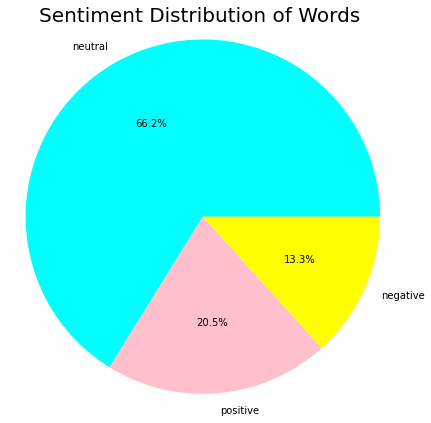

,index,sentiments
0,neutral,13171
1,positive,4083
2,negative,2647


In [35]:
# Plotting pie chart of Sentiment Distribution of words
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

words["sentiments"]=words["cluster_value"].map(emotion)


fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["cyan","pink","yellow"]
df_pie=words["sentiments"].value_counts().reset_index()
plt.pie(df_pie["sentiments"],labels=df_pie["index"],radius=2,colors=colors,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Sentiment Distribution of Words ", fontsize=20)
plt.show()
df_pie

### Out of 19911 unique words and bigram from the dataset:
   * 13171 (66.2%) are Neutral sentiments
   * 4083 (20.5%) are Positive sentiments
   * 2657 (13.3%) are Negative sentiments
   
It shows that the Neutral and Positive words have larger domination in the dataset

In [36]:
# define a function to get the sentiment for the entire tweet
def get_sentiments(x,sent_dict):
    '''
    x:         List
               Input data: Row of a DataFrame
    sent_dict: Dictionary
               Input: Dictionary of Words: Sentiments
    sentiment: String
               Output: Sentiment of the whole sentence
    
    Function: Getting sentiments of the entire sentence by averaging out the sentiments of individual words
    '''
    total=0
    count=0
    test=x["clean_tweet"]
    for t in test:
        if words_dict.get(t):
            total+=int(sent_dict.get(t))
        count+=1 
    avg=total/count
    sentiment=-1 if avg<-0.15 else 1 if avg >0.15 else 0
    return sentiment

In [37]:
# creating a dictionary of the word and its cluster value
words_dict = dict(zip(words.words, words.cluster_value))

In [38]:
# adding sentiment column
df_cars["sentiment"]=df_cars.apply(get_sentiments,args=(words_dict,),axis=1)

In [39]:
# checking the value counts of each sentiment
df_cars["sentiment"].value_counts()

-1    27062
 0    26349
 1    24056
Name: sentiment, dtype: int64

#### There are 3 classes here
   * 1 signifies a positive class
   * 0 signifies a neutral class
   * -1 signifies a negative class

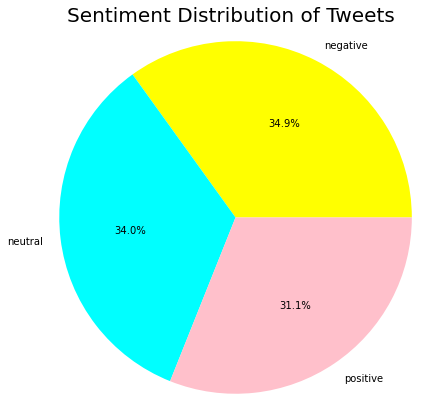

,index,sentiments_val
0,negative,27062
1,neutral,26349
2,positive,24056


In [40]:
# Plotting pie chart of Sentiment Distribution of tweets
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

df_cars["sentiments_val"]=df_cars["sentiment"].map(emotion)
df_pie=df_cars["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(df_pie["sentiments_val"],labels=df_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets ", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
df_pie

#### Out of 77467 tweets from the dataset:
   * 27062(34.9%) are Negative sentiments
   * 26349(34.0%) are Neutral sentiments
   * 24056(31.1%) are Positive sentiments
 
The data seems to be equally spread out between positive, negative, and neutral sentiments with negative sentiments leading marginally

In [41]:
df_negative = df_cars[df_cars["sentiment"]==-1]

In [42]:
# checking the cause of negative tweets in 2019
list(df_negative['cleaned_tweet'][(df_cars['year']==2019)&(df_cars['month']==6)])

["' buy electric car ' possible drive los angeles phoenix without stop charge station hour half ' electric car work",
 'governator take new role slimy pro gas car salesman highlight argument go electric',
 "miss talk impact silent electric car visually impair pedestrian like ' worry sky news bulletin min past hour throughout even catch short clip",
 "still concern electric amp hybrid car road without new engine noise ' lot near miss really affect confidence cross road drive electric vehicle please aware visually impair pedestrian",
 "silent electric vehicle risk visually impair pedestrian like ' hear approach especially busy road talk today new rule require engine noise electric car amp difference make safety",
 'noise electric car would helpful wheelchair user short see park vehicle',
 'buy tesla model aside kid think cool drive sla fully electric car never fun drive amp good environment part solution problem vote safest car nhtsa',
 'sound unnecessary electric car new vehicle emit no

In [43]:
# some Negative tweets
list(df_cars[df_cars["sentiment"]==-1]["cleaned_tweet"][300:330])

['world move fuel electric car amp battery power vehicle mean coloniser slow exploit africa crude oil amp switch exploit africa even coltan amp cobalt',
 'especially love bite shipment move consist electric bike good see cyclist take car road create job truckies win win',
 "govt sell govt land money buy luxurious car officer ' use normal car instead lac worth car govt ask people use electric vehicle reduce pollution buy govt buy ev shabbas",
 'day go cleanairday clean air day leave car home use quieter street go electric lot way travel electric avoid non essential pollute delivery',
 'funny old day make way across nullabor friendly camel think car bite odd run green car diesel generator try useful way mechanic',
 'confuse anyone think car electric answer tbh',
 'really crazy thing labour electric car incentive electricity generate capacity power burn import coal huntly',
 'serious question ask swop electric car plug charge around time well cooker tv etc go would national grid cope surg

## Data Visualization

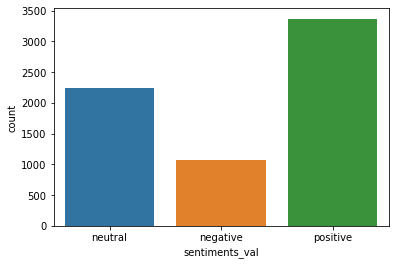

In [44]:
data_list=[" ford"," bmw "," tesla "," audi "," bollingermotors "," hyundai "," dodge "]
pattern="|".join(data_list)
df_car_sent=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]
sns.countplot(x=df_car_sent["sentiments_val"]);

#### Taking a sample of tweets associated with Ford,  BMW, Tesla, Audi, Bollinger Motors, Hyundai, and Dodge:
  * 3400 tweets were having positive and  around 2300 neutral sentiments for these car manufacturers.
  * However, only about 900(13%) tweets were negative. 
  * This shows that more people have positive or reserved thoughts on the EVs, but only a small fraction of people had outright negative sentiments

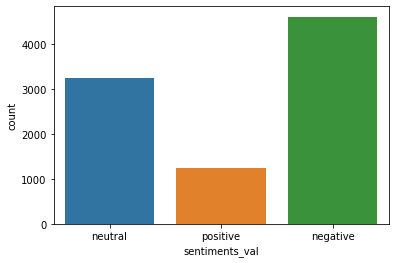

In [45]:
data_list=["costs","batteries"," climate "," fuel "," price "," tax ","afford","privilege","money"]
pattern="|".join(data_list)
df_car_sent=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]
sns.countplot(x=df_car_sent["sentiments_val"]);

#### Taking a  sample of tweets associated with costs, batteries, climate, fuel, price, and safe:
  * These words have concerns attached to them.
  * When taking, these words into account, the sentiments are more inclined towards negative.
  * This shows that more people have a genuine concern about the negative points of EVs. They seem concerned about the costs of the EVs or their negative impacts on the environment 

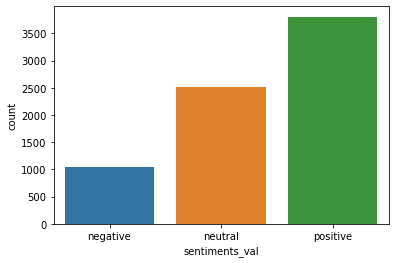

In [46]:
data_list=["tesla"]
pattern="|".join(data_list)
df_car_sent=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]

sns.countplot(x=df_car_sent["sentiments_val"]);

#### Taking a  sample of tweets associated with Tesla:
  * Most of the sentiments are positive, with a very small fraction being Negative
  * Hence, It shows that pioneer of the EV segment, Tesla enjoys a positive reputation among people in the EV market

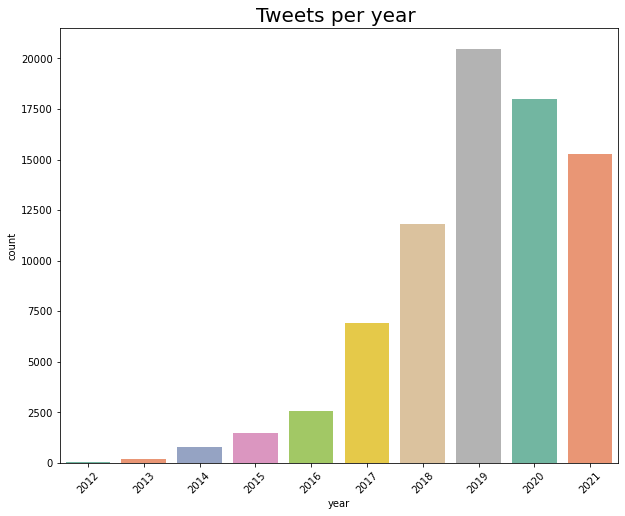

In [157]:
# plot Tweets count
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="year",data=df_cars, palette="Set2");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Tweets per year ", fontsize=20)
#plt.savefig("images/Products Count.png")
plt.show();

##### Most of the tweets are from 2017 onwards, so we can make the assumption , the talk of electric cars became more popular from 2017

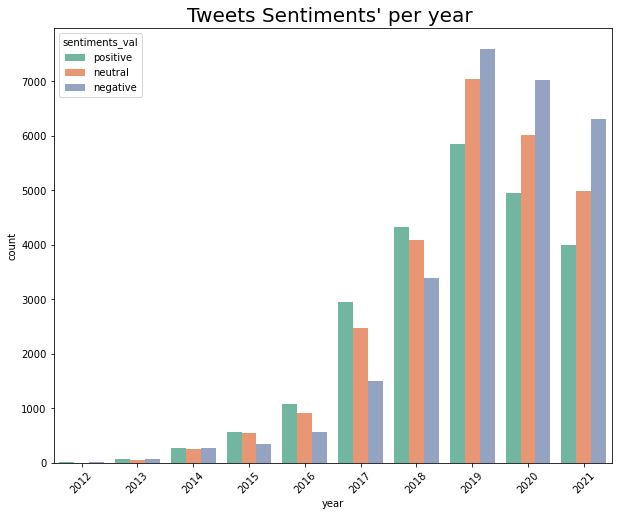

In [158]:
plt.subplots(figsize = (10,8))
chart = sns.countplot(x="year",data=df_cars, palette="Set2",hue="sentiments_val");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Tweets Sentiments' per year ", fontsize=20)
#plt.savefig("images/Tweets_per_year.png")
plt.show();

#### Observation:
 * There has been a steady rise in interest towards Electric cars since 2012.
 *  The number of tweets per year gradually increased from 2017. Hence, we can safely assume, that people are picking up interest in Electric Vehicles in the past 3-4 years.
 * Till 2018 The sentiment was more leaned towards a positive outlook.
 * Although the sentiment is still largely positive, but since 2019, the proportion of negative sentiments have been on a steady rise
* In 2019, there has been an inverse trend leaning more towards negative sentiments because of the concern that quiet EVs made the roads more unsafe for visually impaired walkers, older people, and children. 
* This also can be attributed to the fact that in 2019 had a Climate Action Summit due to which the of people thinking batteries would further Damage the environment might have increased.
 *  In 2020, we had a devastating pandemic which has increased more negative sentiments towards electric cars, as  they have a high-cost price due to the majority of the production facilities remain closed or are not able to attain full production capacity due to shortage of staff and raw materials.
 

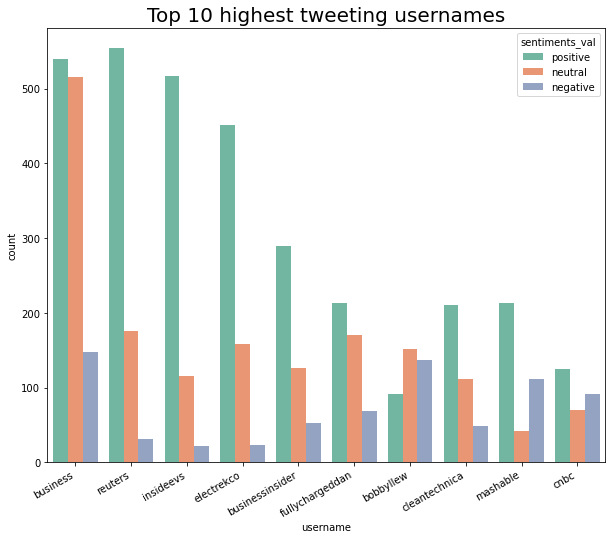

In [48]:
plt.subplots(figsize = (10,8))
plt.title("Top 10 highest tweeting usernames", fontsize=20)
chart=sns.countplot(x="username",hue="sentiments_val",data=df_cars,palette="Set2",
                    order= df_cars["username"].value_counts().iloc[:10].index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');


#### Observation:
 * The top 10 highest tweeting usernames are publications and news channels.
 * The user bobbyllew: Presenter of Fully Charged EV show has the highest proportion of neutral and negative sentiments.
 * Reuters and insideEVS have the highest proportion of positive sentiments amongst all other publications.

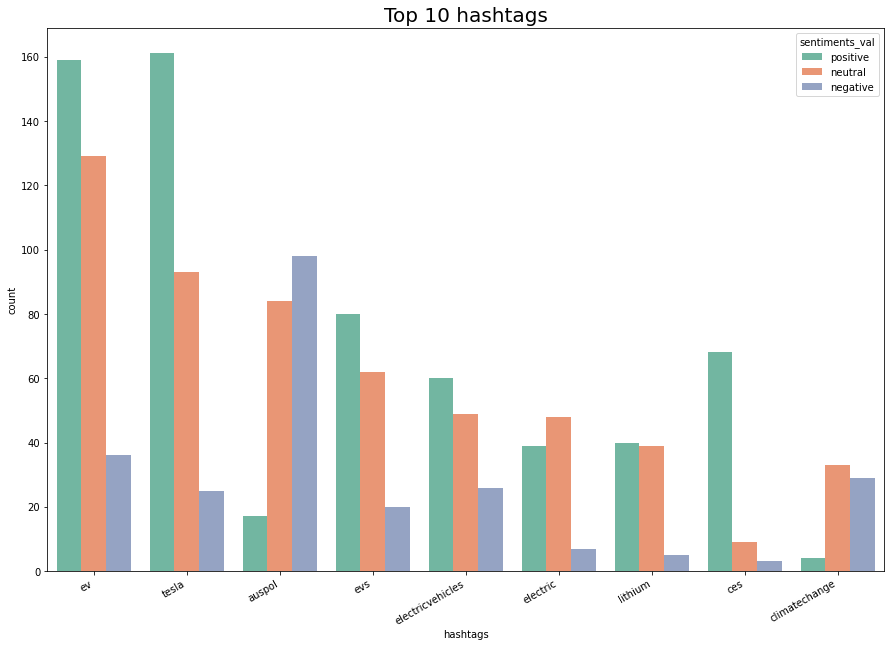

In [49]:
plt.subplots(figsize = (15,10))
plt.title("Top 10 hashtags", fontsize=20)
chart=sns.countplot(x="hashtags",hue="sentiments_val",data=df_cars,palette="Set2",
                    order= df_cars["hashtags"].value_counts().iloc[1:10].index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

#### Observation:
 * All of the top 10 hashtags revolve around Electric vehicles(EV, EVs, Electric Vehicles, Electric). 
 * Tesla features in the top 10 hashtags with more positive-neutral sentiments.
 * Climate-change tags have a high negative sentiment. This shows that people may have some genuine concerns about the increased battery usage/production and its impact on climate.
 * auspol (Australian politics)has a high negative sentiment because Electric and other zero-emission vehicle drivers will pay 2.5 cents for every kilometer traveled on Victorian roads

### Wordcloud

In [50]:
def create_wordcloud(text):
    words=' '.join([words for words in text])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

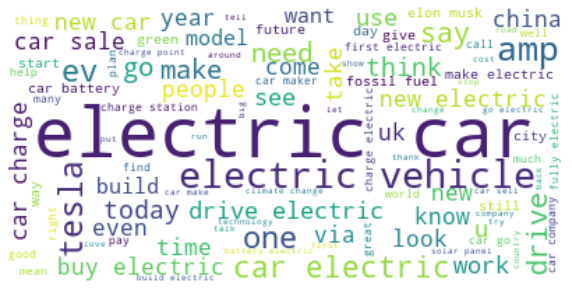

In [51]:
#wordcloud for all tweets
create_wordcloud(df_cars["cleaned_tweet"].values)

#### The most common words across all tweets:
   * Unsurprisingly, the most common word across all tweets is Electric Car
   * words like Tesla, future, City and work are also common across all tweets

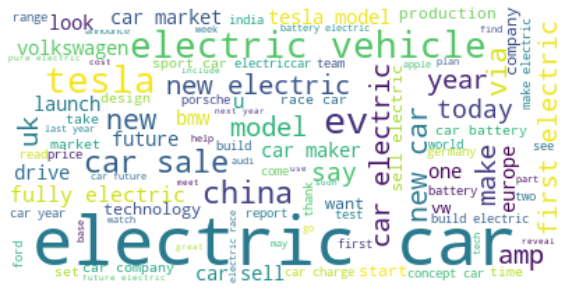

In [52]:
#wordcloud for positive tweets
create_wordcloud(df_cars[df_cars["sentiment"]==1]["cleaned_tweet"].values)

#### The most common words across all Positive tweets are:
   * Electric vehicles manufacturing companies such as Tesla, Volkswagen, BMW, Audi, and Porsche 
   * words such as Love, Sale, future thank and good

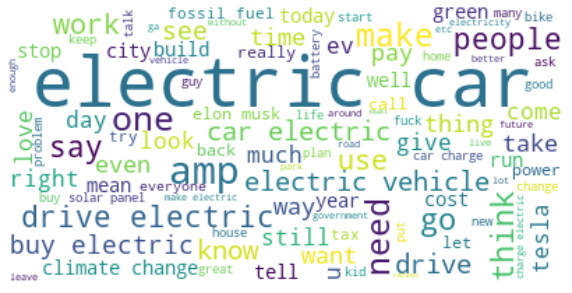

In [53]:
#wordcloud for negative tweets
create_wordcloud(df_cars[df_cars["sentiment"]==-1]["cleaned_tweet"].values)

#### The most common words across all Negative tweets are:
   * Charge Station, Climate change, Energy, battery This shows that there might be certain skepticism about electric cars among the people
   * words such as Pay, Money, Electricity, Tax, and cost, show that people might be worried about the high costs associated with Electric Cars
   * also words like problem, stop, think, time, and  enough 

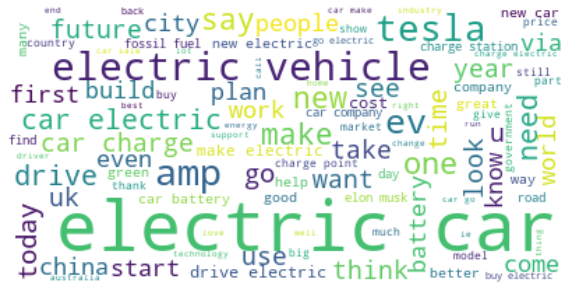

In [54]:
#wordcloud for neutral tweets
create_wordcloud(df_cars[df_cars["sentiment"]==0]["cleaned_tweet"].values)

#### The most common words across all Neutral tweets are:
   * words such as City, Car, Electric, Make, Model dominate most of the tweets with neutral sentiments

## Data Modelling

Considering labels obtained through custom trained word2vec model, we'll split the data into <b>X</b>(Input Tweet) and <b>y</b> (sentiments)

In [55]:
df_cars.head()

,date,username,tweet,language,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
2,2021-06-17,usbtsarmy,[KBS Kpop | 📺YouTube] [Teaser] BTS X SEOUL E-P...,en,bts,"[kb, kpop, youtube, teaser, bts, seoul, prix, ...",kb kpop youtube teaser bts seoul prix eng sub ...,6,2021,1,positive
3,2021-06-17,shaybtsforever,JK looks so fluffy and cuddly here. 🥺 BTS x Se...,en,jungkook,"[jk, look, fluffy, cuddly, bts, seoul, prix, t...",jk look fluffy cuddly bts seoul prix teaser pl...,6,2021,1,positive
4,2021-06-17,jeonwarriors,BTS X SEOUL E-PRIX 2022 Jungkook: Please give ...,en,,"[bts, seoul, prix, jungkook, please, give, lot...",bts seoul prix jungkook please give lot love e...,6,2021,0,neutral
5,2021-06-17,ryuminating,"Here's the YT link! Sorry, I was so excited I ...",en,,"[', yt, link, sorry, excite, forget, mention, ...",' yt link sorry excite forget mention formula ...,6,2021,1,positive
6,2021-06-17,jkusaworld,BTS x Seoul E-Prix 2022 Teaser: #Jungkook 'P...,en,jungkook,"[bts, seoul, prix, teaser, jungkook, ', please...",bts seoul prix teaser jungkook ' please give l...,6,2021,1,positive


##### To avoid Memory Crashing, we'll take 5000 records from each sentiments

In [56]:
# convert each sentiment to df
pos=df_cars[df_cars["sentiments_val"]=="positive"].sample(n=5000)
neg=df_cars[df_cars["sentiments_val"]=="negative"].sample(n=5000)
neu=df_cars[df_cars["sentiments_val"]=="neutral"].sample(n=5000)

In [57]:
# combine all sentiments in one df
pdList = [pos,neg,neu] 
df_train = pd.concat(pdList)

In [58]:
#splitting the data to two(training and testing data)and validation data which I will keep aside for
# model validation later
df2, df_val = train_test_split(df_train, test_size= 0.2, random_state=10)

In [59]:
X = df2['cleaned_tweet']
y = df2['sentiment']

# Split the dataset set int0 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### TF/IDF Features

In [60]:
# Instantiate and fit TfidfVectorizer 
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),
                             stop_words='english')
#http://resources.mpi-inf.mpg.de/departments/d5/teaching/ws11_12/irdm/slides/irdm-3-2.pdf

In [61]:
X_train_tf= vectorizer.fit_transform(X_train.reset_index()["cleaned_tweet"]).toarray()
X_test_tf = vectorizer.transform(X_test.reset_index()["cleaned_tweet"]).toarray()

In [62]:
X_train_tf.shape

(9600, 9509)

In [63]:
feature_names =vectorizer.get_feature_names() 

## Metrics

#### F1 Score (F1)

$$\text{F1} = 2*\frac{\text{precision * recall}}{\text{precision + recall}} $$

$$\text{} = \frac{\text{TP}}{\text{TP+1/2(FP+FN)}} $$


F1 Score  is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.F1-score is a better choice of metric when there are imbalanced classes as in our case. It good F1 score shows that we have less False positives and False negatives.

#### Running the data over various models to check which is best suited model for our data

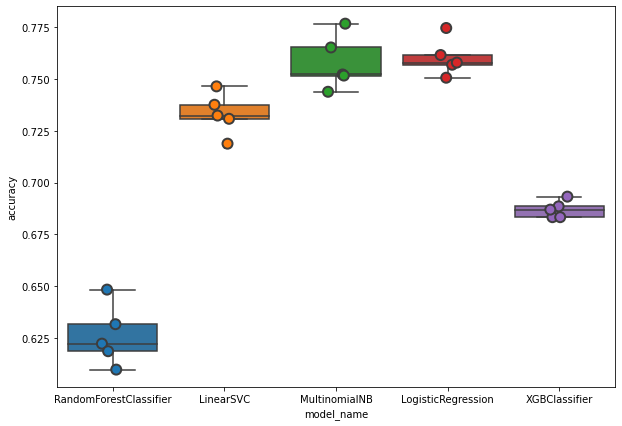

In [64]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
plt.subplots(figsize = (10,7))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

#https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

#### From the above graph, it can be seen that the LogisticRegression  has the highest mean accuracy

In [65]:
# check the mean of the accuracy for each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.733125
LogisticRegression        0.760208
MultinomialNB             0.757812
RandomForestClassifier    0.626250
XGBClassifier             0.687083
Name: accuracy, dtype: float64

### Logistic Regression Model

In [65]:
#creating a dict of Sentiment_val: sentiments to use with the confusion matrix
sentiment_id_df =df_train[['sentiments_val', 'sentiment']].drop_duplicates().sort_values('sentiment')
sentiment_to_id = dict(sentiment_id_df.values)

In [66]:
# Instantiate the model
logisticRegr = LogisticRegression()
# Fit the model
logisticRegr.fit(X_train_tf, y_train)
#Predict
y_pred = logisticRegr.predict(X_test_tf)

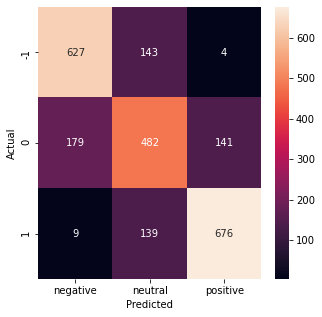

In [67]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [68]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.77      0.81      0.79       774
           0       0.63      0.60      0.62       802
           1       0.82      0.82      0.82       824

    accuracy                           0.74      2400
   macro avg       0.74      0.74      0.74      2400
weighted avg       0.74      0.74      0.74      2400



In [69]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test_tf, y_test)
print(score)

0.74375


#### Feature Importance

In [70]:
# # Referred the below link to plot Most important features(words) within the model
# #https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d#:~:text=Once%20a%20linear%20SVM%20is,can%20be%20accessed%20with%20svm.&text=The%20absolute%20size%20of%20the,for%20the%20data%20separation%20task.

# def plot_coefficients(classification, feature_names, top_features=20):
#     size=len(feature_names)
#     coef_neg = classification.coef_[-1][:size]
#     coef_pos = classification.coef_[1][:size]
#     top_positive_coefficients = np.argsort(coef_pos[coef_pos>0])[-top_features:]
#     top_negative_coefficients = np.argsort(coef_pos[coef_neg<0])[:top_features]
#     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
#     coef=np.hstack([coef_neg,coef_pos])
#     # create plot
#     plt.figure(figsize=(15, 5))
#     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
#     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
#     feature_names = np.array(feature_names)
#     plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
#     title="Positive and Negative Labels"
#     plt.title(title)
#     plt.show()

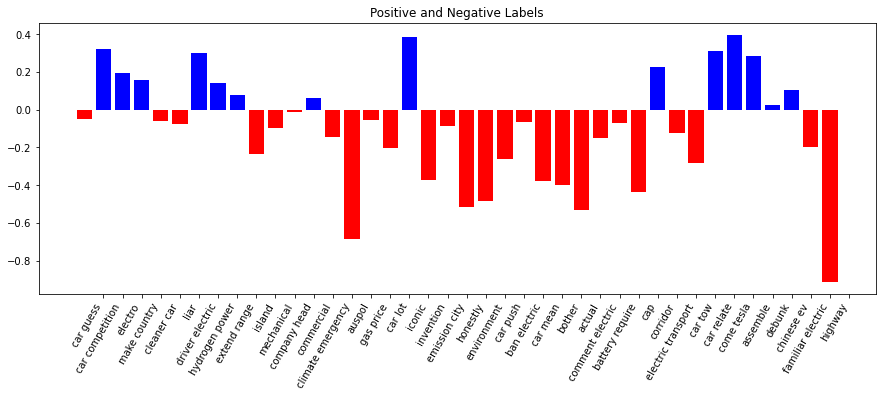

In [71]:
# coefs_with_fns = sorted(zip(logisticRegr.coef_[0], feature_names)) 
# df_feat=pd.DataFrame(coefs_with_fns)
# df_feat.columns='coefficient','word'
# df_feat.sort_values(by='coefficient')

# plot_coefficients(logisticRegr, feature_names)

### MultinomialNB Model

In [72]:
# Instantiate the model
nb = MultinomialNB()
# Fit the model
nb.fit(X_train_tf, y_train)
# predict
y_pred_nb = nb.predict(X_test_tf)

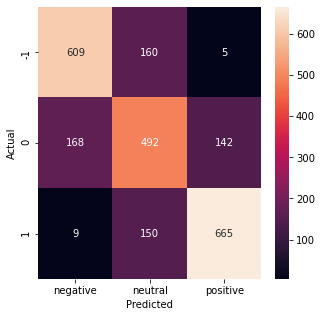

In [73]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [74]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78       774
           0       0.61      0.61      0.61       802
           1       0.82      0.81      0.81       824

    accuracy                           0.74      2400
   macro avg       0.74      0.74      0.74      2400
weighted avg       0.74      0.74      0.74      2400



In [75]:
# Use score method to get accuracy of model
nb_score = nb.score(X_test_tf, y_test)
print(score)

0.74375


### MultinomialNB  VS LogisticRegression

* The mean accuracy of LogisticRegression is 75%
* The mean accuracy of MultinomialNB  is  74.9%
* Although both of the models have very close accuracy scores when we plot the confusion matrix and classification report, we can see that MultinomialNB has a better F1 score than Multinomial Naive Bayes for identifying negative and neutral Tweets 
* As a result, it can identify the negative and neutral tweets more accurately than Logistic Regression.
Hence, We choose Multinomial Naive Bayes as our final model.


In [76]:
#validate the model
df_val= df_val.reset_index()
df_val.tail()

,index,date,username,tweet,language,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
2995,77977,2017-09-13,xhnews,Mercedes-Benz's autonomous concept #SmartVisio...,en,smartvision frankfurtmotorshow,"[mercedes, benz, ', autonomous, concept, smart...",mercedes benz ' autonomous concept smartvision...,9,2017,1,positive
2996,63042,2018-11-11,businessinsider,Mini's electric concept car is perfect for urb...,en,,"[mini, ', electric, concept, car, perfect, urb...",mini ' electric concept car perfect urban dweller,11,2018,0,neutral
2997,4459,2021-05-12,greencarguide,The electric #Audi e-tron GT offers a 298 mile...,en,audi,"[electric, audi, tron, gt, offer, mile, range,...",electric audi tron gt offer mile range amp p r...,5,2021,1,positive
2998,87039,2015-10-13,bosnerdley,This blithering idiot. A green revolution. Ele...,en,,"[blither, idiot, green, revolution, electric, ...",blither idiot green revolution electric car ru...,10,2015,-1,negative
2999,14283,2021-02-02,naijamusings,"@WholeMarsBlog Alex lost me a few years ago, I...",en,,"[alex, lose, year, ago, mean, come, guy, liter...",alex lose year ago mean come guy literally fun...,2,2021,-1,negative


In [77]:
df_cars

,date,username,tweet,language,hashtags,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
2,2021-06-17,usbtsarmy,[KBS Kpop | 📺YouTube] [Teaser] BTS X SEOUL E-P...,en,bts,"[kb, kpop, youtube, teaser, bts, seoul, prix, ...",kb kpop youtube teaser bts seoul prix eng sub ...,6,2021,1,positive
3,2021-06-17,shaybtsforever,JK looks so fluffy and cuddly here. 🥺 BTS x Se...,en,jungkook,"[jk, look, fluffy, cuddly, bts, seoul, prix, t...",jk look fluffy cuddly bts seoul prix teaser pl...,6,2021,1,positive
4,2021-06-17,jeonwarriors,BTS X SEOUL E-PRIX 2022 Jungkook: Please give ...,en,,"[bts, seoul, prix, jungkook, please, give, lot...",bts seoul prix jungkook please give lot love e...,6,2021,0,neutral
5,2021-06-17,ryuminating,"Here's the YT link! Sorry, I was so excited I ...",en,,"[', yt, link, sorry, excite, forget, mention, ...",' yt link sorry excite forget mention formula ...,6,2021,1,positive
6,2021-06-17,jkusaworld,BTS x Seoul E-Prix 2022 Teaser: #Jungkook 'P...,en,jungkook,"[bts, seoul, prix, teaser, jungkook, ', please...",bts seoul prix teaser jungkook ' please give l...,6,2021,1,positive
...,...,...,...,...,...,...,...,...,...,...,...
89831,2012-12-03,forbes,BMW design head Adrian Van Hooydonk on the fut...,en,,"[bmw, design, head, adrian, van, hooydonk, fut...",bmw design head adrian van hooydonk future car...,12,2012,1,positive
89832,2012-11-30,ryan_acoustic,My favorite part of #thelatelateroyshow by far...,en,thelatelateroyshow,"[favorite, part, thelatelateroyshow, far, alwa...",favorite part thelatelateroyshow far always wa...,11,2012,-1,negative
89834,2012-11-28,hollysubritzky,Having to go to the car dealership with this h...,en,rollerprobz electriccar,"[go, car, dealership, hahaaa, rollerprobz, ele...",go car dealership hahaaa rollerprobz electriccar,11,2012,1,positive
89835,2012-11-25,bartmillard,Irony: driving my electric car to get gas for ...,en,,"[irony, drive, electric, car, get, gas, golf, ...",irony drive electric car get gas golf cart,11,2012,-1,negative


#### Testing the data

In [78]:
# create new df contains the sentiment and its encoded value, and create two dictionaries
sentiment_id_df =df_cars[['sentiments_val', 'sentiment']].drop_duplicates().sort_values('sentiment')
sentiment_to_id = dict(sentiment_id_df.values)
print("sentiment_to_id: ",sentiment_to_id)
id_to_sentiment = dict(sentiment_id_df[['sentiment', 'sentiments_val']].values)
print("id_to_sentiment: ",id_to_sentiment)

sentiment_to_id:  {'negative': -1, 'neutral': 0, 'positive': 1}
id_to_sentiment:  {-1: 'negative', 0: 'neutral', 1: 'positive'}


In [79]:
df_cars["tweet"][307]

'@nzlabour Drove there in your electric cars? Over your magical cycle bridge? Or did you use the light rail from the suburbs full of kiwibuild houses? Saw anyone on the way struggling with mental health?   Suffered any crimes on the way? Or did the gangs protect you? Know Farmers hate you?'

In [80]:
tweet = df_cars["tweet"][307]

In [81]:
# test the data
clean=vectorizer.transform([tweet]) #apply TFIDF
pred=logisticRegr.predict(clean) # predict the tweet using out model
pred=id_to_sentiment[pred[0]]
print(pred)

negative


### Validate the model

In [82]:
# Define our X and y
X_val = df_val['cleaned_tweet']
y_val = df_val['sentiment']

In [83]:
# vectorize the model
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),
                             stop_words='english')

In [84]:
X_val_tf= vectorizer.fit_transform(X_val.reset_index()['cleaned_tweet']).toarray()

In [85]:
logisticRegr.fit(X_val_tf, y_val)

LogisticRegression()

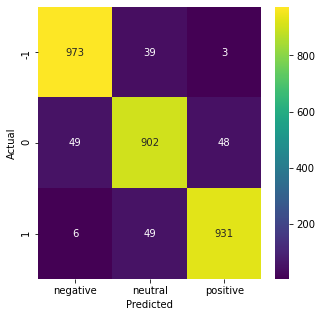

In [86]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_val, logisticRegr.predict(X_val_tf))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='viridis',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [87]:
print(metrics.classification_report(y_val,logisticRegr.predict(X_val_tf)))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95      1015
           0       0.91      0.90      0.91       999
           1       0.95      0.94      0.95       986

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



### Conclusion

* I tried to classify the tweet sentiments using pre-trained models such as Textblob, Bert, and glove. However, I got the best results from a word2vec model trained customly on the Electric cars tweet
* After exploring multiple classifying models through cross-validation technique and vectorizing with dif, and also neural network LSTM and bert model found out that Multinomial NB and Logistics Regression models performed the best on the given dataset
* After filtering out non-English Tweets and removing all tweets which do not have the word:"Car", visualized the dataset and observed that the data seems to be equally spread out between positive, negative, and neutral sentiments.
* All the models perform better with Lemmatization and Tfdif vectorizer. Tfdif gives us most frequently present n-grams(words) within our dataset that helps our model to understand the data more efficiently and map correlations.
* The best performing model of the whole lot was MultinomialNB. It gave us an accuracy of 77% 
* MultinomialNB describes the probability of observing counts among a number of categories which helps us distinguish between positive, neutral, and negative sentiments with a decent accuracy


### Recommendation

* Tweeples (people on Twitter) are enthusiastic about the emergence of EV's and mostly have positive sentiments attached to it
* A lot of them have reserved their thoughts on EVs. Hence, we have a good portion of people with neutral sentiments in the dataset as well
* A fair amount of them has genuine concerns about the impact of EVs on the environment. It will be helpful if experts or car manufacturers could explain the larger impact of EVs on the environment. 
* In early 2019, There is also concern that quiet EVs made the roads more unsafe for visually impaired walkers, older people, and children. However,  the law that required: "Electric cars must make noise after September 2019"  will definitely help build positive sentiments.
* Tweeples are also worried about the costs associated with EVs. However, large tax rebates and lower interest rates might convince them otherwise. in addition to that, Many automakers have plans to make affordable electric vehicles in all shapes and sizes in the coming years.
* Not enough reliable charging stations to accommodate a sudden increase in EV usage, but automakers and charging company EVGo announced plans to add about 700 fast-charging stations. 
 

### Future Work

 * Hyperparameter tuning of multinomial naive bayes to get better scores
 * In the LSTM, We can optimize/fine-tune the model, by trying different values for the hyper parameters to see if the model performance is improving.
 * Take data from the Stock market and compare their stock price with the sentiments of the Tweeples. Observe the charts to see if there are any correlations between the stock prices and sentiments of the people at large.



## Phase 2

### Business problem
* Do Markets reflect the extreme sentiments and human irrationality? Mass psychology's effects may not be the only factor driving the markets, but it’s unquestionably significant
 * With the real-time information available through platforms such as Twitter, we have all the data to correlate the real-time sentiments with respect to market volatility
 * The main objective is to check if the sentiments on Twitter actually correlate with the stock prices and if they do then by what margin?

## The Data

* The Tesla stocks data were collected using **yahoo finance** library 
* The dataset consists of 2761 rows.
* Stocks dated from June 29, 2010, to June 17, 2021.

In [88]:
# import the necessary libraries
import yfinance as yf
import datetime
import time
import requests
import io
%matplotlib inline
#rom matplotlib.pylab import rcParams
from sklearn import preprocessing

# For reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader

In [89]:
# Insert stock data for pull from Yahoo Finance
ticker = "TSLA"
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2021,6,17)

In [90]:
# create empty df
stock_df = pd.DataFrame()

#Download stock price
stock = []
stock = yf.download(ticker, start= start_date, end= end_date, progress= False)
stock_df= stock_df.append(stock, sort= False)

# Add stock symbol column
stock_df['Symbol'] = ticker

#https://www.youtube.com/watch?v=h36VSEfnkxM

In [91]:
#stock_df.to_csv (r'stock_df.csv', index = False, header=True)

In [92]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,TSLA
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,TSLA
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,TSLA
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,TSLA
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,TSLA
...,...,...,...,...,...,...,...
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600,TSLA
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16205300,TSLA
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000,TSLA


In [93]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2761 entries, 2010-06-29 to 2021-06-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2761 non-null   float64
 1   High       2761 non-null   float64
 2   Low        2761 non-null   float64
 3   Close      2761 non-null   float64
 4   Adj Close  2761 non-null   float64
 5   Volume     2761 non-null   int64  
 6   Symbol     2761 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 172.6+ KB


#### The above data has:
 * 8 columns- Out of which 5 are float type, 1 int type and 1 is object type
 * The columns are as follows:
      * Date:       Shows the date
      * Open:       The opening price of the day
      * High:       The highest price of the day
      * Low:        The Lowest price of the day
      * Close:      The closing price of the day
      * Adj. Close: The aadjusted closing price of the day,is considered to be a more technically accurate reflection of the true value of the stock. 
      * Volume:     Volume of stocks traded during the day
      * Symbol:     Symbol of the stock company
 

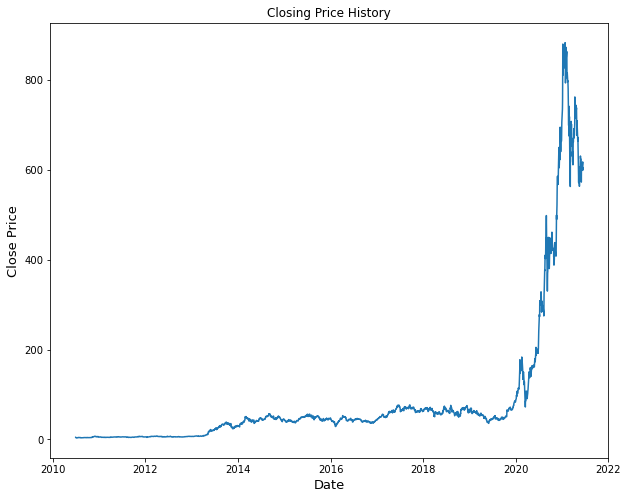

In [94]:
# Plot the closing price history
plt.figure(figsize = (10,8))
plt.plot(stock_df['Close'], label = 'TSLA Closing Price History')
plt.title('Closing Price History')
plt.xlabel('Date', fontsize= 13)
plt.ylabel('Close Price',fontsize= 13);

#### The closing price history chart shows that Tesla stock has picked up a lot since early 2020. However, since late 2020 it seems that prices are oscillating between highs and lows

In [95]:
stock_df=stock_df.reset_index()

In [96]:
# #Breaking the date column of stock records into year and months column for further analysis.
# months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# # A list of months is used to convert numerical values into their equivalent montly names

# stock_df['Date'] = pd.to_datetime(stock_df['Date'])
# stock_df['month'] = pd.Categorical(stock_df['Date'].dt.month_name(locale='English'),categories=months, ordered=True)
# stock_df['year'] = stock_df['Date'].dt.year

In [97]:
# adding two columns, one for month and one for year
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['month'] = stock_df['Date'].dt.month
stock_df['year'] = stock_df['Date'].dt.year

In [98]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,month,year
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,TSLA,6,2010
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,TSLA,6,2010
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,TSLA,7,2010
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,TSLA,7,2010
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,TSLA,7,2010
...,...,...,...,...,...,...,...,...,...,...
2756,2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600,TSLA,6,2021
2757,2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16205300,TSLA,6,2021
2758,2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000,TSLA,6,2021
2759,2021-06-15,616.690002,616.789978,598.229980,599.359985,599.359985,17764100,TSLA,6,2021


In [99]:
# #Breaking the date column of tweet records into months column for further analysis.
# df_cars['month'] = pd.Categorical(df_cars['date'].dt.month_name(locale='English'),categories=months,ordered=True)
# df_cars

### Sentiments vs Stock prices for Tesla

(5053, 11)

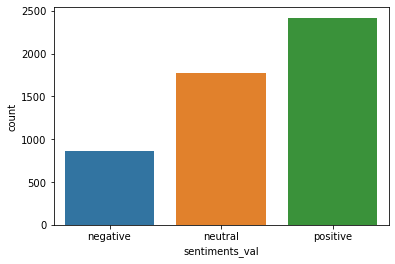

In [100]:
#Plotting a chart of Tesla vs its respective sentiments on twitter across years
data_list=[" tesla "," teslarati "]
#using regex to filter all tweets having above mentioned keywords
pattern="|".join(data_list)
tesla_df=df_cars[(df_cars["cleaned_tweet"].str.contains(pattern))]
sns.countplot(x=tesla_df["sentiments_val"]);
tesla_df.shape

#### Kept all the tweets that contain the following words:
 * Tesla
 * Teslarati
 
Thus all tweets related to Tesla. A brief look at the sentiments suggests that most of the tweets on Tesla are positives.

 ### Year-on-Year basis

#### There are more than one tweets per year. In those cases, we combine the scores for all tweets to get a yearly score.

In [101]:
#Grouping the tweets as per their respective years
# differencing the sentiment using .sum() since it is ranging between -1 and 1
tesla_yr_df=tesla_df.groupby(['year'])["sentiment"].sum()

In [102]:
tesla_yr_df=tesla_yr_df.reset_index()
tesla_yr_df

,year,sentiment
0,2012,1
1,2013,11
2,2014,34
3,2015,47
4,2016,86
5,2017,171
6,2018,268
7,2019,339
8,2020,363
9,2021,236


In [103]:
#Grouping the stock records as per their respective years
stock_yr_df=stock_df.groupby(["year"])["Adj Close"].mean().reset_index()
stock_yr_df

,year,Adj Close
0,2010,4.668369
1,2011,5.360952
2,2012,6.233720
3,2013,20.880246
4,2014,44.665817
5,2015,46.008579
6,2016,41.953452
7,2017,62.863259
8,2018,63.461984
9,2019,54.706040


In [104]:
#Merging tesla sentiment dataFrame and stock records on year column
t1=pd.merge(tesla_yr_df,stock_yr_df, on="year", how="inner")
t1

,year,sentiment,Adj Close
0,2012,1,6.233720
1,2013,11,20.880246
2,2014,34,44.665817
3,2015,47,46.008579
4,2016,86,41.953452
5,2017,171,62.863259
6,2018,268,63.461984
7,2019,339,54.706040
8,2020,363,289.997067
9,2021,236,705.541403


In [105]:
#t1.to_csv (r'stock_sent.csv', index = False, header=True)

In [106]:
#scaling down the data
X = preprocessing.MinMaxScaler()
scaled_yr_df= pd.DataFrame(X.fit_transform(t1.iloc[:,1:]),columns=t1.columns[1:])
scaled_yr_df["year"]=t1["year"]

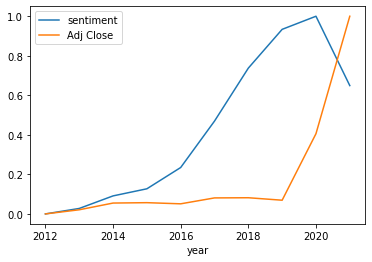

In [107]:
scaled_yr_df.set_index('year').plot();

#### Observations:
* The sentiment curve starts rising gradually from 2015 and peaks in 2019.
* There has been a sharp rise in stock prices since late 2019.
* This shows that momentum of positive sentiments from the year 2015 to 2019 created a very positive and conducive atmosphere for tesla cars, which resulted in sharp rise in their stock prices


### Month-on-Month Basis

### M-o-M basis 2016

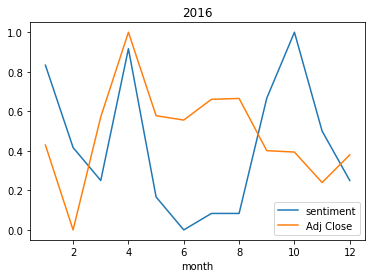

In [149]:
tesla_2016=tesla_df[tesla_df["year"]==2016]
tesla_2016=tesla_2016.groupby(["month"])["sentiment"].sum().reset_index()
stock_2016=stock_df[stock_df["year"]==2016]
stock_2016=stock_2016.groupby(["month"])["Adj Close"].mean().reset_index()
mom_2016=pd.merge(tesla_2016,stock_2016, on="month", how="inner")

scaled_df_2016 = pd.DataFrame(X.fit_transform(mom_2016.iloc[:,1:]),columns=mom_2016.columns[1:])
scaled_df_2016["month"]=mom_2016["month"]
scaled_df_2016.set_index('month').plot()
plt.title('2016');

In [109]:
scaled_df_2016["sentiment"].corr(scaled_df_2016["Adj Close"])

-0.030792921093504847

#### Observations:
* The Sentiment and stock prices curve's followed a similar peak in the April of 2016, and then both witnessed a sharp decline in their values
* Although the Sentiments curve is more volatile, it follows the stock prices curve till August of 2016.
* There onwards, we do not see any correlation as both curves follow a very different trend

### M-o-M basis 2017

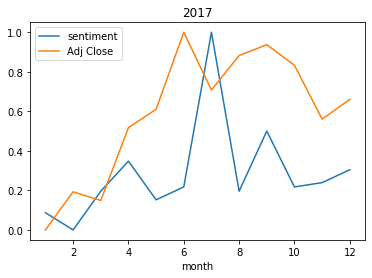

In [151]:
tesla_2017=tesla_df[tesla_df["year"]==2017]
tesla_2017=tesla_2017.groupby(["month"])["sentiment"].sum().reset_index()
stock_2017=stock_df[stock_df["year"]==2017]
stock_2017=stock_2017.groupby(["month"])["Adj Close"].mean().reset_index()
mom_2017=pd.merge(tesla_2017,stock_2017, on="month", how="inner")

scaled_df_2017 = pd.DataFrame(X.fit_transform(mom_2017.iloc[:,1:]),columns=mom_2017.columns[1:])
scaled_df_2017["month"]=mom_2017["month"]
scaled_df_2017.set_index('month').plot()
plt.title('2017');

In [111]:
scaled_df_2017["sentiment"].corr(scaled_df_2017["Adj Close"])

0.3850726704963775

#### Observations:
* The Sentiment and stock prices again followed a similar curve in July of 2017.
* Until August, the stock prices curve is leading the trend which the curve of the sentiment follows. It shows that the sentiments relied more on the stock than vice versa

#### By 2018 there was a sharp rise in both stock price and positive sentiments for Tesla. Let's see if the correlation on a M-o-M basis

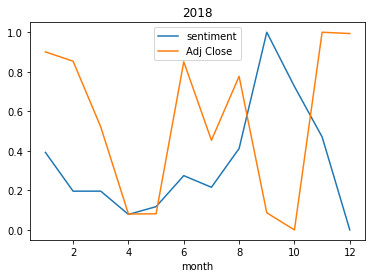

In [152]:
tesla_2018=tesla_df[tesla_df["year"]==2018]
tesla_2018=tesla_2018.groupby(["month"])["sentiment"].sum().reset_index()
stock_2018=stock_df[stock_df["year"]==2018]
stock_2018=stock_2018.groupby(["month"])["Adj Close"].mean().reset_index()
mom_2018=pd.merge(tesla_2018,stock_2018, on="month", how="inner")

scaled_df_2018 = pd.DataFrame(X.fit_transform(mom_2018.iloc[:,1:]),columns=mom_2018.columns[1:])
scaled_df_2018["month"]=mom_2018["month"]
scaled_df_2018.set_index('month').plot()
plt.title('2018');

In [113]:
scaled_df_2018["sentiment"].corr(scaled_df_2018["Adj Close"])

-0.31689618999483515

#### Observations:

* There was a sharp decline in sentiments in April-May of 2018 and a similar decline can be seen in the stock prices.
* Recovery can be seen in June and August in both stocks and sentiments.
* similar decline and recovery can be seen throughout the year in both stocks and sentiments till the beginning of September
* The rise and fall of sentiments are more extreme as compared to stocks. This can be because people are usually at the extreme when expressing their excitement or anguish, but the same cannot be said about the regulated stock markets


### M-o-M basis 2019

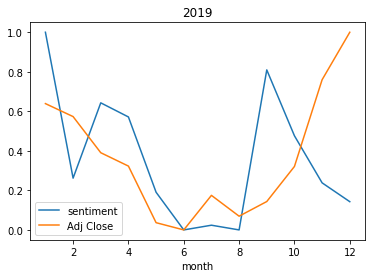

In [153]:
tesla_2019=tesla_df[tesla_df["year"]==2019]
tesla_2019=tesla_2019.groupby(["month"])["sentiment"].sum().reset_index()
stock_2019=stock_df[stock_df["year"]==2019]
stock_2019=stock_2019.groupby(["month"])["Adj Close"].mean().reset_index()
mom_2019=pd.merge(tesla_2019,stock_2019, on="month", how="inner")

scaled_df_2019 = pd.DataFrame(X.fit_transform(mom_2019.iloc[:,1:]),columns=mom_2019.columns[1:])
scaled_df_2019["month"]=mom_2019["month"]
scaled_df_2019.set_index('month').plot()
plt.title('2019');

In [115]:
scaled_df_2019["sentiment"].corr(scaled_df_2019["Adj Close"])

0.1899830354044159

#### Observations:
* Both the curves followed a similar declining trend till August of 2019.
* However, The stock prices picked up mightily since August 2019. The sentiments curve did not follow that steep quickly.

### M-o-M basis during Covid period: 2020

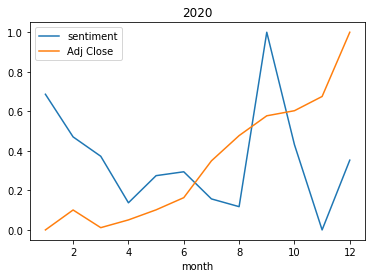

In [154]:
tesla_2020=tesla_df[tesla_df["year"]==2020]
tesla_2020=tesla_2020.groupby(["month"])["sentiment"].sum().reset_index()
stock_2020=stock_df[stock_df["year"]==2020]
stock_2020=stock_2020.groupby(["month"])["Adj Close"].mean().reset_index()
mom_2020=pd.merge(tesla_2020,stock_2020, on="month", how="inner")

scaled_df_2020 = pd.DataFrame(X.fit_transform(mom_2020.iloc[:,1:]),columns=mom_2020.columns[1:])
scaled_df_2020["month"]=mom_2020["month"]
scaled_df_2020.set_index('month').plot()
plt.title('2020');

In [117]:
scaled_df_2020["sentiment"].corr(scaled_df_2020["Adj Close"])

-0.03574565127012261

#### Observations

* The year 2020 has been a complete anomaly.
* The Stock prices and sentiments had a similar curve trend from April till June and from August till October. After that, there has been a completely negative trend in the sentiments whereas the stock prices have flourished
* This trend can be attributed to the fact that most people were going through a tough time in the latter half of 2020.
* The positive spike in stocks can be attributed to external factors such as beneficial government policies, tax rebated or acquisition of new markets for Tesla 


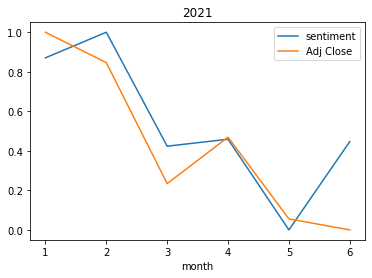

In [155]:
tesla_2021=tesla_df[tesla_df["year"]==2021]
tesla_2021=tesla_2021.groupby(["month"])["sentiment"].sum().reset_index()
stock_2021=stock_df[stock_df["year"]==2021]
stock_2021=stock_2021.groupby(["month"])["Adj Close"].mean().reset_index()
mom_2021=pd.merge(tesla_2021,stock_2021, on="month", how="inner")

scaled_df_2021 = pd.DataFrame(X.fit_transform(mom_2021.iloc[:,1:]),columns=mom_2021.columns[1:])
scaled_df_2021["month"]=mom_2021["month"]
scaled_df_2021.set_index('month').plot()
plt.title('2021');
#plt.savefig("images/Sentiment_stock 2021.png");

In [156]:
scaled_df_2021["sentiment"].corr(scaled_df_2021["Adj Close"])

0.8628390193606004

In [120]:
scaled_df_2021["Adj Close"].corr(scaled_df_2021["sentiment"])

0.8628390193606004

#### Observations:
* Both the stock prices and Sentiments curve have followed an exceptionally similar trend in the current year.
* The values for both the curves have been a little volatile this year.
* Since May, the sentiments for Tesla seemed to have improved, whereas the stock prices are still on a decline

## Daily Analysis of stock versus sentiments for 2021

In [121]:
tesla_2021=tesla_df[tesla_df["year"]==2021]
tesla_2021=tesla_2021.groupby(["date"])["sentiment"].sum().reset_index()
tesla_2021

,date,sentiment
0,2021-01-01,3
1,2021-01-02,2
2,2021-01-03,0
3,2021-01-04,4
4,2021-01-05,12
...,...,...
162,2021-06-13,5
163,2021-06-14,1
164,2021-06-15,1
165,2021-06-16,0


In [122]:
#filtering stock records for the year 2021 and grouping them by date
stock_2021=stock_df[stock_df["year"]==2021]
stock_2021=stock_2021.groupby(["Date"])["Adj Close"].mean().reset_index()

In [123]:
# merging the above two dataFrames on the common column "Date"
daily_2021=pd.merge(tesla_2021,stock_2021, left_on="date",right_on="Date", how="inner")
daily_2021.drop("Date",axis=1,inplace=True)

In [124]:
# scaling the df
scaled_df = pd.DataFrame(X.fit_transform(daily_2021.iloc[:,1:]),columns=daily_2021.columns[1:])
scaled_df

,sentiment,Adj Close
0,0.578947,0.521010
1,1.000000,0.537692
2,0.631579,0.602893
3,0.263158,0.790528
4,0.631579,0.990409
...,...,...
108,0.421053,0.147209
109,0.526316,0.146490
110,0.421053,0.170858
111,0.421053,0.113593


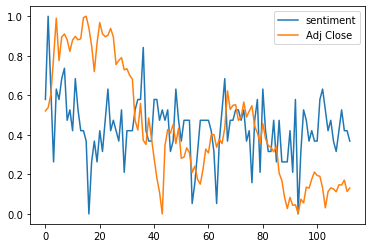

In [125]:
scaled_df.plot();

In [126]:
#correlation between sentiments and stocks on a daily basis
scaled_df["sentiment"].corr(scaled_df["Adj Close"])

0.13197765573547438

In [127]:
scaled_df["Adj Close"].corr(scaled_df["sentiment"])

0.13197765573547438

#### Observations:
* The above plot is similar to the chart that we plotted for 2021 on a monthly basis.
* Here, Both the curves are following a very similar trend till May. However, they do not correlate with each other strongly.

## Weekly analysis for stocsk vs sentiments in 2021

In [128]:
tesla_2021=tesla_df[tesla_df["year"]==2021]
tesla_2021['Week_Number'] = tesla_2021['date'].dt.week
tesla_2021=tesla_2021[tesla_2021["Week_Number"]!=53]
tesla_2021=tesla_2021.groupby(["Week_Number"])["sentiment"].sum().reset_index()
tesla_2021

,Week_Number,sentiment
0,1,31
1,2,28
2,3,16
3,4,-12
4,5,7
5,6,34
6,7,11
7,8,27
8,9,14
9,10,8


In [129]:
#filtering stock records for the year 2021 and grouping them by week
stock_2021=stock_df[stock_df["year"]==2021]
stock_2021['Week_Number'] = stock_2021['Date'].dt.week
stock_2021=stock_2021[stock_2021["Week_Number"]!=53]
stock_2021=stock_2021.groupby(["Week_Number"])["Adj Close"].mean().reset_index()
stock_2021

,Week_Number,Adj Close
0,1,783.383997
1,2,837.239990
2,3,846.657501
3,4,851.402002
4,5,853.901990
5,6,829.095996
6,7,790.762497
7,8,702.616003
8,9,655.492004
9,10,659.593994


In [130]:
# merging the above two dataFrames on the common column "week number"
weekly_2021=pd.merge(tesla_2021,stock_2021, on="Week_Number",how="inner")
weekly_2021

,Week_Number,sentiment,Adj Close
0,1,31,783.383997
1,2,28,837.239990
2,3,16,846.657501
3,4,-12,851.402002
4,5,7,853.901990
5,6,34,829.095996
6,7,11,790.762497
7,8,27,702.616003
8,9,14,655.492004
9,10,8,659.593994


In [131]:
scaled_weekly_2021 = pd.DataFrame(X.fit_transform(weekly_2021.iloc[:,1:]),columns=weekly_2021.columns[1:])
scaled_weekly_2021

,sentiment,Adj Close
0,0.934783,0.745181
1,0.869565,0.939791
2,0.608696,0.973822
3,0.000000,0.990966
4,0.413043,1.000000
5,1.000000,0.910363
6,0.500000,0.771844
7,0.847826,0.453324
8,0.565217,0.283040
9,0.434783,0.297863


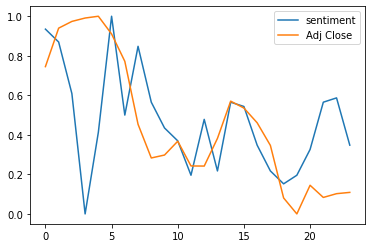

In [132]:
scaled_weekly_2021.plot();

In [133]:
scaled_weekly_2021["sentiment"].corr(scaled_weekly_2021["Adj Close"])

0.3777655973860456

In [134]:
scaled_weekly_2021["Adj Close"].corr(scaled_weekly_2021["sentiment"])

0.37776559738604565

#### Observations:
* The week-to-week week chart has a better correlation between the stock prices and sentiments curve as compared to the day-to-day chart
* The trend, however, remains the same as we observed in daily and monthly analysis of stock prices VS sentiments.

### For 2 Weeks in 2021

In [135]:
tesla_2021=tesla_df[tesla_df["year"]==2021]
tesla_2021['Week_Number'] = tesla_2021['date'].dt.week
tesla_2021=tesla_2021[tesla_2021["Week_Number"]!=53]
tesla_2021=tesla_2021[tesla_2021["Week_Number"].isin([14,15])]
tesla_2021=tesla_2021.groupby(["date"])["sentiment"].sum().reset_index()
tesla_2021

,date,sentiment
0,2021-04-05,1
1,2021-04-06,-1
2,2021-04-07,-6
3,2021-04-08,0
4,2021-04-09,3
5,2021-04-10,-1
6,2021-04-11,2
7,2021-04-12,6
8,2021-04-13,0
9,2021-04-14,2


In [136]:
#filtering stock records for the year 2021 and grouping them by week
stock_2021=stock_df[stock_df["year"]==2021]
stock_2021['Week_Number'] = stock_2021['Date'].dt.week
stock_2021=stock_2021[stock_2021["Week_Number"]!=53]
stock_2021=stock_2021[stock_2021["Week_Number"].isin([14,15])]
stock_2021=stock_2021.groupby(["Date"])["Adj Close"].mean().reset_index()
stock_2021

,Date,Adj Close
0,2021-04-05,691.049988
1,2021-04-06,691.619995
2,2021-04-07,670.969971
3,2021-04-08,683.799988
4,2021-04-09,677.020020
5,2021-04-12,701.979980
6,2021-04-13,762.320007
7,2021-04-14,732.229980
8,2021-04-15,738.849976
9,2021-04-16,739.780029


In [137]:
# merging the above two dataFrames on the common column "date"
two_Weeks=pd.merge(tesla_2021,stock_2021, left_on="date",right_on="Date", how="inner")
two_Weeks.drop("Date",axis=1,inplace=True)
two_Weeks

,date,sentiment,Adj Close
0,2021-04-05,1,691.049988
1,2021-04-06,-1,691.619995
2,2021-04-07,-6,670.969971
3,2021-04-08,0,683.799988
4,2021-04-09,3,677.020020
5,2021-04-12,6,701.979980
6,2021-04-13,0,762.320007
7,2021-04-14,2,732.229980
8,2021-04-15,2,738.849976
9,2021-04-16,3,739.780029


In [138]:
scaled_two_Weeks = pd.DataFrame(X.fit_transform(two_Weeks.iloc[:,1:]),columns=two_Weeks.columns[1:])
scaled_two_Weeks

,sentiment,Adj Close
0,0.583333,0.219814
1,0.416667,0.226054
2,0.000000,0.000000
3,0.500000,0.140449
4,0.750000,0.066229
5,1.000000,0.339464
6,0.500000,1.000000
7,0.666667,0.670607
8,0.666667,0.743076
9,0.750000,0.753257


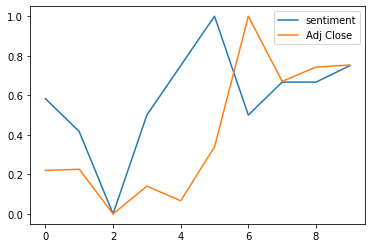

In [139]:
scaled_two_Weeks.plot();

In [140]:
scaled_two_Weeks["sentiment"].corr(scaled_two_Weeks["Adj Close"])

0.32050177922383083

In [141]:
scaled_two_Weeks["Adj Close"].corr(scaled_two_Weeks["sentiment"])

0.32050177922383083

#### Observations:
* The week 14 and 15 of 2021  (April 5 till April 18), of the year 2021 have shown a good trend and a good correlation. 
* The curves seem to follow each other, However, their correlation is not strong enough to predict future results

### Trying different weeks

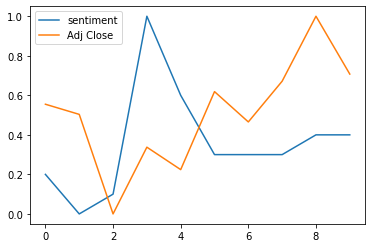

In [142]:
tesla_2021=tesla_df[tesla_df["year"]==2020]
tesla_2021['Week_Number'] = tesla_2021['date'].dt.week
tesla_2021=tesla_2021[tesla_2021["Week_Number"]!=53]
tesla_2021=tesla_2021[tesla_2021["Week_Number"].isin([20,21])]
tesla_2021=tesla_2021.groupby(["date"])["sentiment"].sum().reset_index()
stock_2021=stock_df[stock_df["year"]==2020]
stock_2021['Week_Number'] = stock_2021['Date'].dt.week
stock_2021=stock_2021[stock_2021["Week_Number"]!=53]
stock_2021=stock_2021[stock_2021["Week_Number"].isin([20,21])]
stock_2021=stock_2021.groupby(["Date"])["Adj Close"].mean().reset_index()
two_Weeks=pd.merge(tesla_2021,stock_2021, left_on="date",right_on="Date", how="inner")
two_Weeks.drop("Date",axis=1,inplace=True)
scaled_two_Weeks = pd.DataFrame(X.fit_transform(two_Weeks.iloc[:,1:]),columns=two_Weeks.columns[1:])
scaled_two_Weeks.plot();

In [143]:
scaled_two_Weeks["sentiment"].corr(scaled_two_Weeks["Adj Close"])

-0.05333085962399579

#### Observations:
* There is no correlation in the last 2 weeks of the year 2021.

### Daily/weekly/monthly stock vs sentiment data since 2016

In [144]:
#Tesla data from year 2016
tesla_years=tesla_df[tesla_df["year"].isin([2016,2017,2018,2019,2020,2021])]
tesla_years=tesla_years.groupby(["date"])["sentiment"].sum().reset_index()
# tesla_years['Week_Number'] = tesla_years['date'].dt.week
# tesla_years['month'] =  pd.Categorical(tesla_years['date'].dt.month_name(locale='English'),categories=months, ordered=True)
# tesla_years['year'] = tesla_years['date'].dt.year
tesla_years

,date,sentiment
0,2016-01-04,2
1,2016-01-05,2
2,2016-01-06,2
3,2016-01-07,2
4,2016-01-08,1
...,...,...
1431,2021-06-13,5
1432,2021-06-14,1
1433,2021-06-15,1
1434,2021-06-16,0


In [145]:
#Stock data from year 2016

stock_years=stock_df[stock_df["year"].isin([2016,2017,2018,2019,2020,2021])]
stock_years=stock_years.groupby(["Date"])["Adj Close"].mean().reset_index()
stock_years

,Date,Adj Close
0,2016-01-04,44.681999
1,2016-01-05,44.686001
2,2016-01-06,43.807999
3,2016-01-07,43.130001
4,2016-01-08,42.200001
...,...,...
1368,2021-06-10,610.119995
1369,2021-06-11,609.890015
1370,2021-06-14,617.690002
1371,2021-06-15,599.359985


In [146]:
# merging the above two dataFrames on the common column "date"
since2016_df=pd.merge(tesla_years,stock_years, left_on="date",right_on="Date", how="inner")
since2016_df.drop("Date",axis=1,inplace=True)
since2016_df

,date,sentiment,Adj Close
0,2016-01-04,2,44.681999
1,2016-01-05,2,44.686001
2,2016-01-06,2,43.807999
3,2016-01-07,2,43.130001
4,2016-01-08,1,42.200001
...,...,...,...
1010,2021-06-10,1,610.119995
1011,2021-06-11,3,609.890015
1012,2021-06-14,1,617.690002
1013,2021-06-15,1,599.359985


In [147]:
## Adding week,month and yearly columns
since2016_df['Week_Number'] = since2016_df['date'].dt.week
since2016_df['month'] =  since2016_df['date'].dt.month
since2016_df['year'] = since2016_df['date'].dt.year
since2016_df

,date,sentiment,Adj Close,Week_Number,month,year
0,2016-01-04,2,44.681999,1,1,2016
1,2016-01-05,2,44.686001,1,1,2016
2,2016-01-06,2,43.807999,1,1,2016
3,2016-01-07,2,43.130001,1,1,2016
4,2016-01-08,1,42.200001,1,1,2016
...,...,...,...,...,...,...
1010,2021-06-10,1,610.119995,23,6,2021
1011,2021-06-11,3,609.890015,23,6,2021
1012,2021-06-14,1,617.690002,24,6,2021
1013,2021-06-15,1,599.359985,24,6,2021


In [148]:
#since2016_df.to_csv (r'since2016_df.csv', index = False, header=True)

## Conclusion

* The Sentiments curve and stock prices have shown a similar trend over the past few years. 
* They have followed very close to each other for major parts of the year 2017.2018,2019 and 2021.
* The Year 2020 was a complete anomaly wherein the stock prices boomed but the sentiments plummeted. However, this can be attributed to the devastating effects of the pandemic.
* The year 2021 brings some hope wherein both stock prices and sentiments have shown a good amount of appreciation in their values.

### Points of concern:

* Although the curves are able to map a trend with respect to each other. They fail to have a strong correlation except for 2021.
* In the absence of a strong correlation, prediction becomes challenging. Hence, it is near impossible to have good stock prices predictions based only on the sentiments.
* Also, it can be seen that it's the sentiments' curve that follows the stock market curve and not the other way around. This makes sense, as people usually tend to react to the stock prices

### Final Thought:
* The above analysis proves that it is possible to capture a trend between stock prices and the sentiments of the people. However, I could not find any conclusive evidence to suggest that sentiments, as a standalone feature, are good enough to predict stock prices